In [3]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.under_sampling import RandomUnderSampler 

# Necessary to get names out
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [4]:
features_num = [
    "RA", "DEC", "E_RA", "E_DEC", "Total_flux", "E_Total_flux", "Peak_flux", 
    "E_Peak_flux", "Maj", "Min", "PA", "E_Maj", "E_Min", "E_PA", "DC_Maj", 
    "DC_Min", "DC_PA", "Isl_rms", "lr_fin", "ALPHA_J2000", "DELTA_J2000", "EBV", 
    "NUV_flux_corr", "NUV_fluxerr_corr", "NUV_mag_corr", "NUV_magerr_corr", 
    "u_flux_corr", "u_fluxerr_corr", "u_mag_corr", "u_magerr_corr", 
    "Bw_flux_corr", "Bw_fluxerr_corr", "Bw_mag_corr", "Bw_magerr_corr", 
    "R_flux_corr", "R_fluxerr_corr", "R_mag_corr", "R_magerr_corr", "I_flux_corr", 
    "I_fluxerr_corr", "I_mag_corr", "I_magerr_corr", "z_flux_corr", "z_fluxerr_corr", 
    "z_mag_corr", "z_magerr_corr", "z_Subaru_flux_corr", "z_Subaru_fluxerr_corr", "z_Subaru_mag_corr", 
    "z_Subaru_magerr_corr", "y_flux_corr", "y_fluxerr_corr", "y_mag_corr", 
    "y_magerr_corr", "J_flux_corr", "J_fluxerr_corr", "J_mag_corr", 
    "J_magerr_corr", "H_flux_corr", "H_mag_corr", "H_magerr_corr", 
    "K_flux_corr", "K_fluxerr_corr", "K_mag_corr", "K_magerr_corr",  
    "Ks_fluxerr_corr", "Ks_mag_corr", "Ks_magerr_corr", "ch1_flux_corr",  
    "ch1_fluxerr_corr", "ch1_mag_corr", "ch1_magerr_corr", "ch2_flux_corr", 
    "ch2_fluxerr_corr", "ch2_mag_corr", "ch3_flux_corr", "ch3_fluxerr_corr", 
    "ch3_mag_corr", "ch3_magerr_corr",  "ch4_flux_corr", "ch4_fluxerr_corr",  
    "ch4_magerr_corr",  "Separation", "CLASS_STAR",  
    "F_MIPS_24", "FErr_MIPS_24_u",  "FErr_MIPS_24_l", "Bkg_MIPS_24",  
    "Sig_conf_MIPS_24", "Rhat_MIPS_24", "n_eff_MIPS_24", "Pval_res_24",  
    "F_PACS_100", "FErr_PACS_100_u", "FErr_PACS_100_l", "F_PACS_160",  
    "FErr_PACS_160_u", "FErr_PACS_160_l", "Bkg_PACS_100", "Bkg_PACS_160",  
    "Sig_conf_PACS_100", "Sig_conf_PACS_160", "Rhat_PACS_100", "Rhat_PACS_160",  
    "n_eff_PACS_100",  "n_eff_PACS_160",  "Pval_res_100",  "Pval_res_160",  
    "F_SPIRE_250",  "FErr_SPIRE_250_u",  "FErr_SPIRE_250_l", "F_SPIRE_350", 
    "FErr_SPIRE_350_u", "FErr_SPIRE_350_l", "F_SPIRE_500", "FErr_SPIRE_500_u", 
    "FErr_SPIRE_500_l", "Bkg_SPIRE_250", "Bkg_SPIRE_350", "Bkg_SPIRE_500", 
    "Sig_conf_SPIRE_250", "Sig_conf_SPIRE_350", "Sig_conf_SPIRE_500", 
    "Rhat_SPIRE_250", "Rhat_SPIRE_350", "Rhat_SPIRE_500", "n_eff_SPIRE_250", 
    "n_eff_SPIRE_500", "n_eff_SPIRE_350", "Pval_res_250", "Pval_res_350", 
    "Pval_res_500", "Z_BEST", "Z_BEST_SOURCE", "Z_SPEC", "Z_SOURCE", 
    "Z_QUAL", "RA_ZSPEC", "DEC_ZSPEC", "REL", "z1_median", "z1_min", 
    "z1_max", "z1_area", "z2_median", "z2_min", "z2_max", "z2_area", 
    "nfilt_eazy", "nfilt_atlas", "nfilt_ananna", "chi_r_best", 
    "chi_r_stellar", "zmodel", "chi_best", "Mass_median", 
    "Mass_l68", "Mass_u68", "Nfilts", "u_rest", "Bw_rest", "R_rest", 
    "I_rest", "z_rest", "z_Subaru_rest", "y_rest", "J_rest", "H_rest", 
    "K_rest", "Ks_rest", "ch1_rest", "ch2_rest", "ch3_rest", "ch4_rest", 
    "XrayFlux_0.5-2", "XrayHardness", 'FUV_flux_corr', 'FUV_fluxerr_corr', 
    'FUV_mag_corr', 'FUV_magerr_corr', 'H_fluxerr_corr', 'Ks_flux_corr', 
    'ch2_magerr_corr', 'ch4_mag_corr'

]

not_sure_columns = [
    "AGN", "optAGN", "IRAGN", "AGN_ZSPEC", "XrayAGN", "ap_to_model_z_Subaru", 
    "ap_to_model_err_z_Subaru", "ap_to_model_z", "ap_to_model_err_z", 
]

not_using_columns = [
    "AGN_final", "RadioAGN_final", "FLAG_OVERLAP_RADIO", "NoID", "optRA", "optDec", "LGZ_Size", "LGZ_Width",
    'Source_Name', 'NoID', 'optRA', 'optDec', 'LGZ_Size', 'LGZ_Width', 'LGZ_PA', 
    'Assoc', 'Assoc_Qual', 'Art_prob', 'Blend_prob', 'Hostbroken_prob', 'Imagemissing_prob', 
    'Zoom_prob', 'FLAG_DEEP', 'ID_OPTICAL', 'ID_SPITZER', 'ID', 
    'help_id', 'RA_HELP', 'DEC_HELP', 'OBJID'
]
    

features_cat_binary = [
    "flag_mips_24", "flag_PACS_100", "flag_PACS_160", "flag_spire_250", 
    "flag_spire_350", "flag_spire_500", "XID+_rerun_mips", "XID+_rerun_pacs", 
    "XID+_rerun_SPIRE", "Position_from", "FLAG_OVERLAP"
]
features_cat_non_binary = [
   "S_Code", "FLAG_WORKFLOW", "Prefilter", "Created", "flag_clean_radio", "flag_clean", "stellar_type"
]
y_column = "Classification"

classes = ['Other', 'quasar-like radio AGN / high-excitation radio galaxy']

In [5]:
data = pd.read_csv("../../../Data/Fangyou_data/Cleaned/Complete_Bootes_clean.csv")

In [6]:
mapping = {"jet-mode radio AGN/low-excitation radio galaxy": "Other",
          "quasar-like radio AGN / high-excitation radio galaxy": "quasar-like radio AGN / high-excitation radio galaxy",
          "radio-quiet AGN": "Other",
          "star-forming galaxy": "Other"}
data['Classification'] = data['Classification'].map(mapping)

<AxesSubplot:>

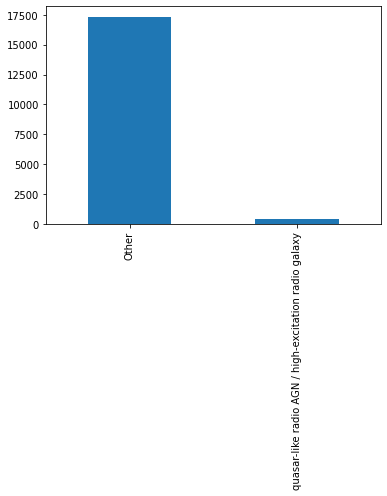

In [7]:
# Changing infinities into nan's
data = data.replace([np.inf,-np.inf], np.nan)
data['Classification'].value_counts().plot(kind='bar')

In [8]:
# Creating the pipeline
transformer_num = make_pipeline(
    SimpleImputer(strategy="mean"),  # there are a few missing values
    StandardScaler(),
)
# Almost all cat features are already binary, so don't have to be one-hot encoded
transformer_cat_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
)
transformer_cat_non_binary = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat_binary, features_cat_binary),
    (transformer_cat_non_binary, features_cat_non_binary),
)

In [9]:
# Dropping required columns
X = data
y = data[y_column]

In [10]:
# Manually ordinally encoding, since we cannot use get_features_names out else
X[features_cat_binary] = OrdinalEncoder().fit_transform(X[features_cat_binary])

In [11]:
# Transforming y to labels
le = preprocessing.LabelEncoder()
labels = np.unique(y)
y = le.fit_transform(y)

# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
# Transforming the data, data that isn't in any of the pipelines is dropped automatically
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
# Class weights
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_all = [class_weight[i] for i in y_train]

# PCA

# Random forest

In [14]:
clf = RandomForestClassifier(n_estimators=100, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [15]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

                                               Other     0.9757    0.9997    0.9876      3459
quasar-like radio AGN / high-excitation radio galaxy     0.5000    0.0115    0.0225        87

                                            accuracy                         0.9755      3546
                                           macro avg     0.7379    0.5056    0.5050      3546
                                        weighted avg     0.9641    0.9755    0.9639      3546



[]

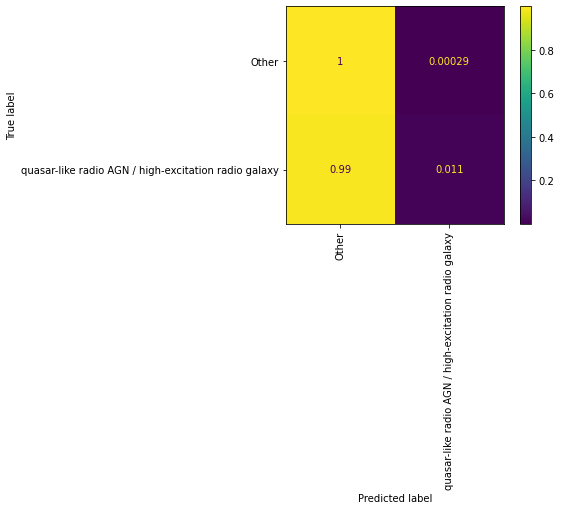

In [16]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

In [17]:
random_forest_feature_importance = pd.DataFrame(
    np.array([preprocessor.get_feature_names_out(), clf.feature_importances_]).T,
                                               columns=['Feature', 'Importance'])
random_forest_feature_importance = random_forest_feature_importance.sort_values(by=['Importance'], ascending=False)

[]

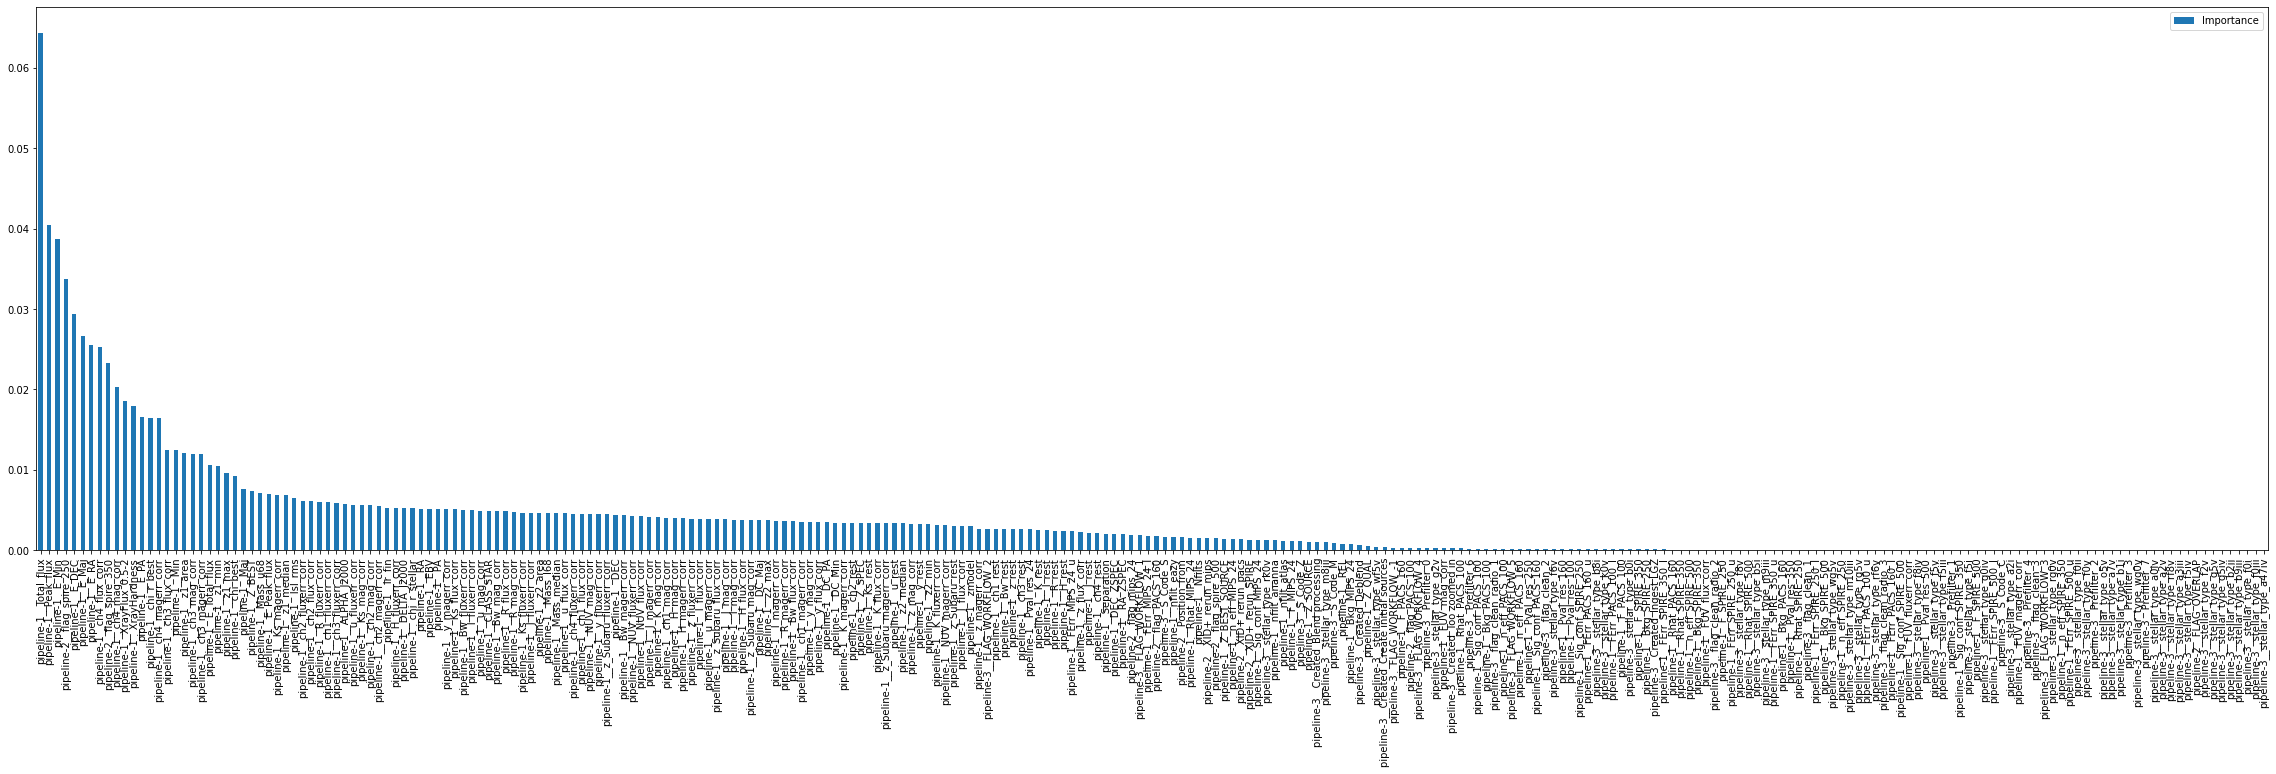

In [18]:
ax = random_forest_feature_importance.plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

In [19]:
random_forest_feature_importance["Cumulative"] = np.cumsum(random_forest_feature_importance["Importance"])
random_forest_feature_importance

,Feature,Importance,Cumulative
4,pipeline-1__Total_flux,0.064367,0.064367
6,pipeline-1__Peak_flux,0.040421,0.104788
12,pipeline-1__E_Min,0.038717,0.143506
187,pipeline-2__flag_spire_250,0.033711,0.177217
3,pipeline-1__E_DEC,0.029408,0.206624
...,...,...,...
231,pipeline-3__stellar_type_b2ii,0.0,1.0
234,pipeline-3__stellar_type_b9iii,0.0,1.0
235,pipeline-3__stellar_type_f0i,0.0,1.0
237,pipeline-3__stellar_type_f0iii,0.0,1.0


In [21]:
random_forest_feature_importance.iloc[0:150,2]

187    0.046339
4      0.075258
6      0.100569
188    0.123869
142     0.14227
         ...   
158    0.980664
189    0.981678
82      0.98266
135    0.983567
139     0.98446
Name: Cumulative, Length: 150, dtype: object

[]

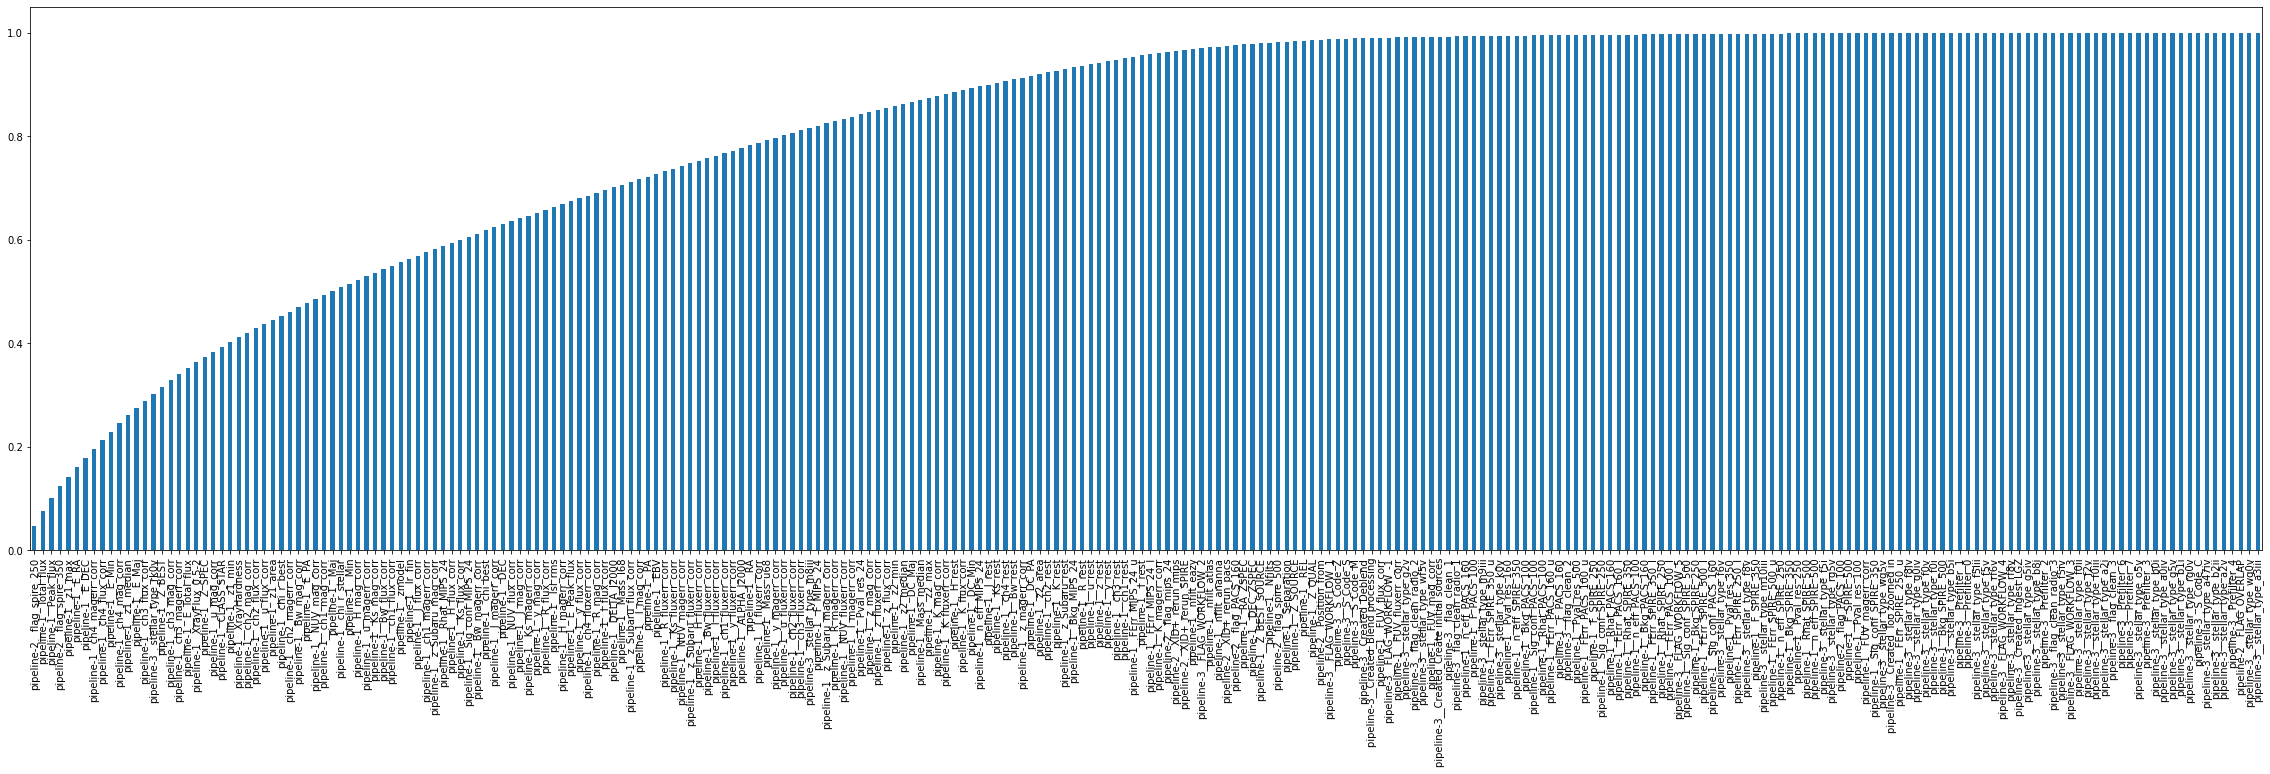

In [22]:
ax = random_forest_feature_importance['Cumulative'].plot(kind='bar', figsize=(40,10))
ax.set_xticklabels(random_forest_feature_importance.Feature)
plt.plot()

# XGboost

In [20]:
sampler = RandomUnderSampler()
X_res, y_res = sampler.fit_resample(X_train, y_train)

In [21]:
model = XGBClassifier(use_label_encoder=False, 
                      max_depth=8, 
                      reg_alpha=3, 
                      reg_lambda=5,
                     eta=0.3, 
                     n_estimators=1000)
bst = model.fit(X_res, y_res, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=True)

[10:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.59339
[1]	validation_0-logloss:0.53669
[2]	validation_0-logloss:0.48325
[3]	validation_0-logloss:0.45553
[4]	validation_0-logloss:0.43637
[5]	validation_0-logloss:0.41497
[6]	validation_0-logloss:0.40284
[7]	validation_0-logloss:0.38106
[8]	validation_0-logloss:0.37434
[9]	validation_0-logloss:0.36804
[10]	validation_0-logloss:0.35852
[11]	validation_0-logloss:0.36122
[12]	validation_0-logloss:0.35372
[13]	validation_0-logloss:0.34808
[14]	validation_0-logloss:0.34540
[15]	validation_0-logloss:0.34899
[16]	validation_0-logloss:0.34607
[17]	validation_0-logloss:0.33735
[18]	validation_0-logloss:0.33877
[19]	validation_0-logloss:0.33348
[20]	validation_0-lo

In [22]:
# Training accuracy
y_pred = model.predict(X_res)
print(classification_report(y_res, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

                                               Other     0.9934    0.9967    0.9951       304
quasar-like radio AGN / high-excitation radio galaxy     0.9967    0.9934    0.9951       304

                                            accuracy                         0.9951       608
                                           macro avg     0.9951    0.9951    0.9951       608
                                        weighted avg     0.9951    0.9951    0.9951       608



In [23]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

                                               Other     0.9946    0.8502    0.9168      3459
quasar-like radio AGN / high-excitation radio galaxy     0.1205    0.8161    0.2101        87

                                            accuracy                         0.8494      3546
                                           macro avg     0.5576    0.8332    0.5634      3546
                                        weighted avg     0.9731    0.8494    0.8994      3546



[]

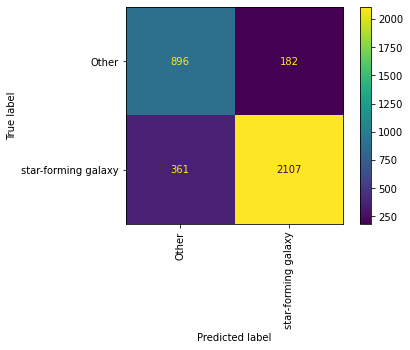

In [81]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# LightBM

In [24]:
param = {"max_depth": 7, "min_child_samples": 5, 
         "num_leaves": 32, "reg_alpha": 1, "reg_lambda": 2}

In [33]:
lightbm = lgb.LGBMClassifier(max_depth=7, min_child_samples= 5,
                             num_leaves=32, reg_alpha=1, 
                             reg_lambda=2 ,
                             num_class=1, objective="binary",  n_estimators=1000, class_weight="balanced",
                            early_stopping_rounds=20)

In [34]:
bst = lightbm.fit(X_train, y_train)

ValueError: For early stopping, at least one dataset and eval metric is required for evaluation

In [27]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
# Training accuracy
y_pred = bst.predict(X_train)
print(classification_report(y_train, np.rint(y_pred), target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

                                               Other     0.9954    1.0000    0.9977     13879
quasar-like radio AGN / high-excitation radio galaxy     1.0000    0.7895    0.8824       304

                                            accuracy                         0.9955     14183
                                           macro avg     0.9977    0.8947    0.9400     14183
                                        weighted avg     0.9955    0.9955    0.9952     14183



In [29]:
y_pred = bst.predict(X_test)
print(classification_report(y_test, np.rint(y_pred), target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

                                               Other     0.9804    0.9991    0.9897      3459
quasar-like radio AGN / high-excitation radio galaxy     0.8571    0.2069    0.3333        87

                                            accuracy                         0.9797      3546
                                           macro avg     0.9188    0.6030    0.6615      3546
                                        weighted avg     0.9774    0.9797    0.9736      3546



[]

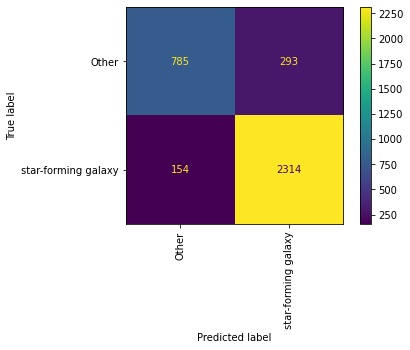

In [128]:
cm = confusion_matrix(y_test, np.rint(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()

# Tabnet

# SVM

In [319]:
clf = svm.SVC(kernel="linear", class_weight="balanced")
clf.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

In [320]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

                                                      precision    recall  f1-score   support

      jet-mode radio AGN/low-excitation radio galaxy     0.6693    0.7857    0.7229       644
quasar-like radio AGN / high-excitation radio galaxy     0.2186    0.5732    0.3165        82
                                     radio-quiet AGN     0.5578    0.7397    0.6360       411
                                 star-forming galaxy     0.9389    0.7912    0.8588      2409

                                            accuracy                         0.7792      3546
                                           macro avg     0.5962    0.7224    0.6335      3546
                                        weighted avg     0.8291    0.7792    0.7957      3546



[]

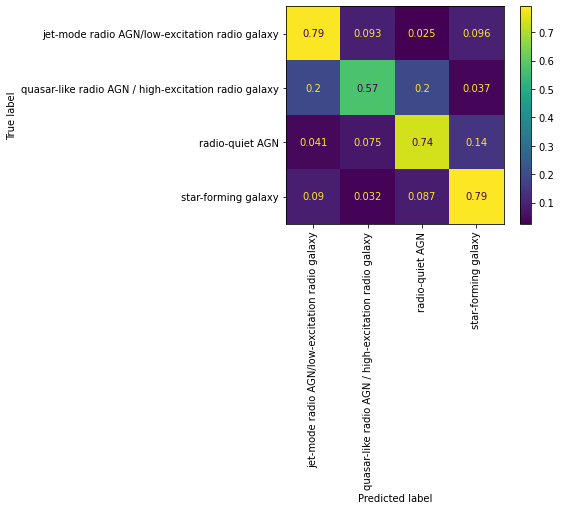

In [321]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.xticks(rotation = 90)
plt.plot()